pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.


In [1]:
import pandas as pd
df_train = pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 分析train data

確認train data的數量與個特徵的分佈

In [9]:
df_train.shape

(891, 12)

In [14]:
df_train.describe()[1:]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# 判斷null的數量
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 分析存活的可能"分類"特徵

In [28]:
# 分析train的存活比例
df_train.groupby('Survived').count()['Name']/df_train.shape[0]

Survived
0    0.616162
1    0.383838
Name: Name, dtype: float64

In [96]:
# 存活率根據分類型欄位的比例
def survive_ratio(col_name):
    col_list = df_train.groupby(col_name).count().index.tolist()
    for i in col_list:
        col_df = df_train[df_train[col_name]==i]
        result = col_df[[col_name,'Survived','Name']].groupby([col_name,'Survived']).count()/col_df.shape[0]
        print(result)

In [226]:
# 根據類別來分析存活率
def sur_plot(col_name):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    labels =  df_train.groupby(col_name).count().index.tolist()
    Dead_list = []
    Survival_list = []

    for i in labels:
        col_df = df_train[df_train[col_name] == i]
        result = col_df[[col_name,'Survived','Name']].groupby([col_name,'Survived']).count()/col_df.shape[0]
        Dead_list.append(round(result['Name'].tolist()[0], 2))
        Survival_list.append(round(result['Name'].tolist()[1], 2))
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Dead_list, width, label='Dead')
    rects2 = ax.bar(x + width/2, Survival_list, width, label='Survival')

    ax.set_ylabel('Survival Rate')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

                     Name
Sex    Survived          
female 0         0.257962
       1         0.742038
                   Name
Sex  Survived          
male 0         0.811092
     1         0.188908


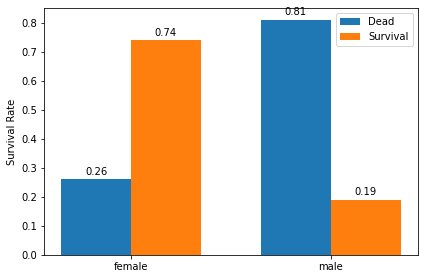

In [227]:
survive_ratio('Sex')
sur_plot('Sex')

* 以性別來看，女性的存活比較明顯高於男性，達到74.2％
* 男性存活比例相當低，僅18.89%

                    Name
Pclass Survived         
1      0         0.37037
       1         0.62963
                     Name
Pclass Survived          
2      0         0.527174
       1         0.472826
                     Name
Pclass Survived          
3      0         0.757637
       1         0.242363


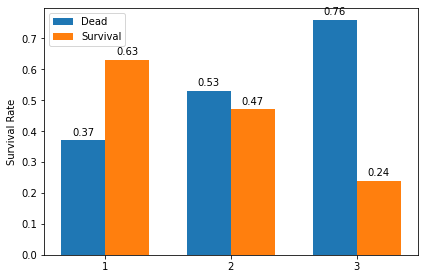

In [204]:
survive_ratio('Pclass')
sur_plot('Pclass')

* 頭等艙的存活率最高，達到62.9%
* 三等艙存活率最低，24.2%

                       Name
Embarked Survived          
C        0         0.446429
         1         0.553571
                      Name
Embarked Survived         
Q        0         0.61039
         1         0.38961
                       Name
Embarked Survived          
S        0         0.663043
         1         0.336957


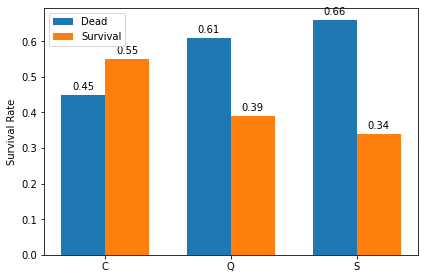

In [205]:
# 確認出發港口對於存活率的影響
survive_ratio('Embarked')
sur_plot('Embarked')

* C港口出航的人，相比Q、S有較高的存活率

In [113]:
# 確認一下每個艙等的性別比例
df_train.groupby(['Embarked','Pclass']).count()['Name']

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         127
          2         164
          3         353
Name: Name, dtype: int64

C港口有較高的存活率合理，因為該港上船的多數為頭等艙的乘客

### 判斷存活的可能"數值"特徵
數值特徵主要有Age,SibSp,Parch,Fare

In [311]:
df_train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [327]:
# 將Age分成8等分，區分年齡層，總共切成9個節點
age_df = df_train['Age']
bins = np.linspace(min(age_df), max(age_df), 9).tolist()
bins

[0.42,
 10.3675,
 20.315,
 30.262500000000003,
 40.21,
 50.1575,
 60.105000000000004,
 70.0525,
 80.0]

In [328]:
# 把每個年齡層的存活率算出來
labels =  df_train[['Survived','Age']].groupby([pd.cut(df_train.Age, bins),'Survived']).count()['Age']
Dead_list = []
Survival_list = []
start = 0
end = 1

while len(labels) > end:
    bin_dead = labels.tolist()[start]
    bin_sur = labels.tolist()[end]
    bin_sum = bin_dead + bin_sur
    Dead_list.append(bin_dead/bin_sum)
    Survival_list.append(bin_sur/bin_sum)
    start += 2
    end += 2

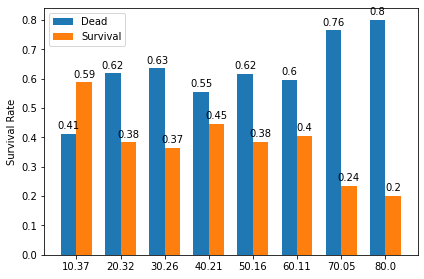

In [329]:
# 根據類別來分析存活率
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels =  bins[1:]
labels = [round(i,2) for i in labels]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Dead_list, width, label='Dead')
rects2 = ax.bar(x + width/2, Survival_list, width, label='Survival')

ax.set_ylabel('Survival Rate')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

年紀較大的乘客有較高的死亡率，10歲以下年紀小的則是存活率較高

In [337]:
# 根據Age製作數值類別的分析圖表函數，num為想分成多少區域
def sur_plot_2(col_name, num):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    age_df = df_train[col_name]
    bins = np.linspace(min(age_df), max(age_df), num+1).tolist()
    
    labels =  df_train[['Survived',col_name]].groupby([pd.cut(df_train[col_name], bins),'Survived']).count()[col_name]
    Dead_list = []
    Survival_list = []
    start = 0
    end = 1

    while len(labels) > end:
        bin_dead = labels.tolist()[start]
        bin_sur = labels.tolist()[end]
        bin_sum = bin_dead + bin_sur
        Dead_list.append(bin_dead/bin_sum)
        Survival_list.append(bin_sur/bin_sum)
        start += 2
        end += 2

    labels =  bins[1:]
    labels = [round(i,2) for i in labels]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, Dead_list, width, label='Dead')
    rects2 = ax.bar(x + width/2, Survival_list, width, label='Survival')

    ax.set_ylabel('Survival Rate')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height,2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()
    


### 船票價格對於死亡率影響

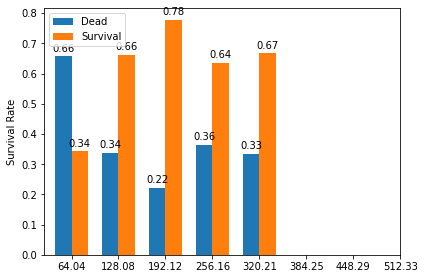

In [348]:
sur_plot_2('Fare',8)

In [350]:
# 判斷為何高價船票只有少數人
len(df_train[df_train['Fare'] > 320])

3

低價船票的乘客的確有較高的死亡率，但存活率最高的則是在128~192間的船票

### 親屬數量的影響

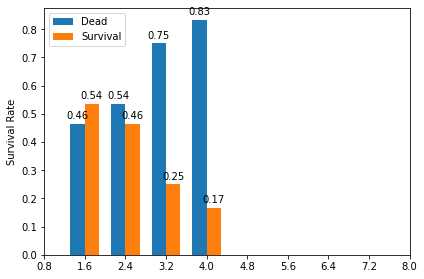

In [354]:
sur_plot_2('SibSp',10)

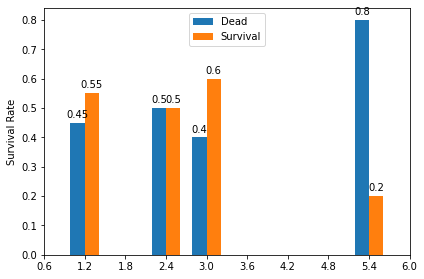

In [355]:
sur_plot_2('Parch',10)

<AxesSubplot:>

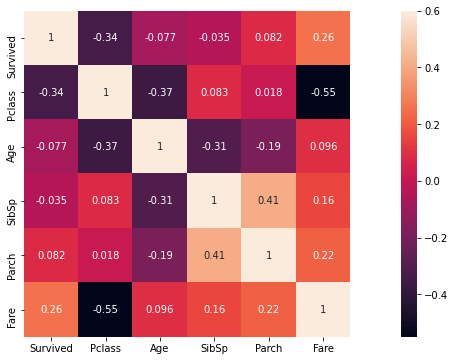

In [359]:
import seaborn as sns
plt.figure(figsize=(18,6))
sns.heatmap(df_train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

### Feature Extraction 特徵抽取 
* 最終要預測結果為生存或者死亡，屬於分類器，我們要把特徵改為類別特徵
* 修改特徵Sex, Age, SibSp, Parch, Fare, Embarked

In [492]:
# 先將測試與訓練樣本進行合併，統一修改
df_test = pd.read_csv('test.csv')
train_test_data = pd.concat([df_train, df_test], axis = 0)
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Sex 性別特徵抽取

In [495]:
train_test_data['Sex'].head()

0      male
1    female
2    female
3    female
4      male
Name: Sex, dtype: object

In [496]:
# 將male換為1，female換為0
train_test_data['Sex'] = train_test_data['Sex'].map({'male':1, 'female':0}).astype('int')

In [497]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


### Embarked港口將字母換數字

In [498]:
train_test_data.groupby('Embarked')['Embarked'].count()

Embarked
C    270
Q    123
S    914
Name: Embarked, dtype: int64

In [499]:
train_test_data['Embarked'] = train_test_data['Embarked'].map({'C':0, 'Q':1, 'S':2})

In [500]:
train_test_data.groupby('Embarked')['Embarked'].count()

Embarked
0.0    270
1.0    123
2.0    914
Name: Embarked, dtype: int64

In [501]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2.0


### Age特徵抽取
* 需要先針對空值進行填充
* 可以先算出平均與標準差，將整個Age分兩個標準差內的四區間，與外面的兩個區間

In [503]:
age_describe = train_test_data['Age'].describe()
age_describe

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

進行null填充

In [552]:
# 將整個訓練集重新編index
train_test_data = train_test_data.reset_index(drop=True)
age_mean = age_describe['mean']
age_std = age_describe['std']

In [555]:
print(train_test_data['Age'].head(20).tolist())

[22.0, 38.0, 26.0, 35.0, 35.0, 19.0, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, 14.0, 55.0, 2.0, 25.0, 31.0, 35.0]


In [556]:
# 開始進行替換，將null換成一個標準差內的隨機數
for i in train_test_data.index.tolist():
    if train_test_data.loc[i,'Age'] / 1 > 0:
        pass
    else:
        train_test_data.loc[i,'Age'] = np.random.randint(age_mean - age_std, age_mean + age_std)


In [557]:
# 六個區間的五個節點
age_bin = [age_mean - 2*age_std,age_mean - age_std ,age_mean,age_mean + age_std,age_mean + 2*age_std]
age_bin

[1.0541512447613712,
 15.467644456032692,
 29.881137667304014,
 44.29463087857533,
 58.708124089846656]

In [558]:
#進行區間的取代，利用判斷式來進行置換
train_test_data.loc[train_test_data['Age'] <= age_bin[0], 'Age'] = 0
train_test_data.loc[(train_test_data['Age'] > age_bin[0]) & (train_test_data['Age'] <= age_bin[1]), 'Age'] = 1
train_test_data.loc[(train_test_data['Age'] > age_bin[1]) & (train_test_data['Age'] <= age_bin[2]), 'Age'] = 2
train_test_data.loc[(train_test_data['Age'] > age_bin[2]) & (train_test_data['Age'] <= age_bin[3]), 'Age'] = 3
train_test_data.loc[(train_test_data['Age'] > age_bin[3]) & (train_test_data['Age'] <= age_bin[4]), 'Age'] = 4
train_test_data.loc[train_test_data['Age'] > age_bin[4], 'Age'] = 5

In [561]:
# 檢查換完Age的結果
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,7.2500,NaN,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,7.9250,NaN,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,113803,53.1000,C123,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,3.0,0,0,373450,8.0500,NaN,2.0


### Fare特徵抽取
* 可以先算出平均與標準差，將整個Fare分兩個標準差內的四區間，與外面的兩個區間

In [565]:
fare_describe = train_test_data['Fare'].describe()
fare_describe

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [566]:
# 先試試用標準差
fare_mean = fare_describe['mean']
fare_std = fare_describe['std']
fare_bin = [fare_mean - 2*fare_std, fare_mean - fare_std ,fare_mean,fare_mean + fare_std,fare_mean + 2*fare_std]
fare_bin

[-70.22185719700266,
 -18.463188957828542,
 33.29547928134557,
 85.05414752051968,
 136.8128157596938]

In [567]:
# 直接分四等分
fare_bin = [fare_describe['25%'],fare_describe['50%'],fare_describe['75%']]
fare_bin

[7.8958, 14.4542, 31.275]

In [568]:
# 利用四等份來進行清理工作
train_test_data.loc[train_test_data['Fare'] <= fare_bin[0], 'Fare'] = 0
train_test_data.loc[(train_test_data['Fare'] > fare_bin[0]) & (train_test_data['Fare'] <= fare_bin[1]), 'Fare'] = 1
train_test_data.loc[(train_test_data['Fare'] > fare_bin[1]) & (train_test_data['Fare'] <= fare_bin[2]), 'Fare'] = 2
train_test_data.loc[train_test_data['Fare'] > fare_bin[2], 'Fare'] = 3

In [569]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,3.0,C85,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,1.0,NaN,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,113803,3.0,C123,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,3.0,0,0,373450,1.0,NaN,2.0


### SibSp, Parch特徵抽取

In [571]:
SibSp_describe = train_test_data['SibSp'].describe()
SibSp_describe

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [575]:
# SibSp分類看一下，可以分成0,1與其他即可
train_test_data.groupby('SibSp').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,891,608,891,891,891,891,891,891,890,171,889
1,319,209,319,319,319,319,319,319,319,110,319
2,42,28,42,42,42,42,42,42,42,10,42
3,20,16,20,20,20,20,20,20,20,4,20
4,22,18,22,22,22,22,22,22,22,0,22
5,6,5,6,6,6,6,6,6,6,0,6
8,9,7,9,9,9,9,9,9,9,0,9


In [576]:
train_test_data.loc[train_test_data['SibSp'] == 0, 'SibSp'] = 0
train_test_data.loc[train_test_data['SibSp'] == 1, 'SibSp'] = 1
train_test_data.loc[train_test_data['SibSp'] > 1, 'SibSp'] = 2

In [578]:
train_test_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,3.0,C85,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,1.0,NaN,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,113803,3.0,C123,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,3.0,0,0,373450,1.0,NaN,2.0


In [580]:
# Parch分類看一下，可以分成0,1即可
train_test_data.groupby('Parch').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Ticket,Fare,Cabin,Embarked
Parch,,,,,,,,,,,
0,1002,678,1002,1002,1002,1002,1002,1002,1001,205,1000
1,170,118,170,170,170,170,170,170,170,56,170
2,113,80,113,113,113,113,113,113,113,29,113
3,8,5,8,8,8,8,8,8,8,3,8
4,6,4,6,6,6,6,6,6,6,2,6
5,6,5,6,6,6,6,6,6,6,0,6
6,2,1,2,2,2,2,2,2,2,0,2
9,2,0,2,2,2,2,2,2,2,0,2


In [581]:
train_test_data.loc[train_test_data['Parch'] == 0, 'Parch'] = 0
train_test_data.loc[train_test_data['Parch'] > 0, 'Parch'] = 1

In [584]:
train_test_data[]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",1,2.0,1,0,A/5 21171,0.0,NaN,2.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,3.0,1,0,PC 17599,3.0,C85,0.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,2.0,0,0,STON/O2. 3101282,1.0,NaN,2.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,3.0,1,0,113803,3.0,C123,2.0
4,5,0.0,3,"Allen, Mr. William Henry",1,3.0,0,0,373450,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",1,2.0,0,0,A.5. 3236,1.0,NaN,2.0
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",0,3.0,0,0,PC 17758,3.0,C105,0.0
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",1,3.0,0,0,SOTON/O.Q. 3101262,0.0,NaN,2.0
1307,1308,NaN,3,"Ware, Mr. Frederick",1,3.0,0,0,359309,1.0,NaN,2.0


### 移除沒有價值的欄位

In [585]:
train_test_data = train_test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [586]:
train_test_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3,1,2.0,1,0,0.0,2.0
1,1.0,1,0,3.0,1,0,3.0,0.0
2,1.0,3,0,2.0,0,0,1.0,2.0
3,1.0,1,0,3.0,1,0,3.0,2.0
4,0.0,3,1,3.0,0,0,1.0,2.0
...,...,...,...,...,...,...,...,...
1304,NaN,3,1,2.0,0,0,1.0,2.0
1305,NaN,1,0,3.0,0,0,3.0,0.0
1306,NaN,3,1,3.0,0,0,0.0,2.0
1307,NaN,3,1,3.0,0,0,1.0,2.0
